# Imports

In [1]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [2]:
files = sorted(glob.glob("*.csv"))

df = pd.DataFrame()

for fpath in files:
    df_ = pd.read_csv(fpath)
    if df.size == 0:
        df = df_.copy()
    else:
        df = pd.concat([df, df_])
        
print(df.shape)

(64, 4)


In [3]:
name_dict = {False: "NumPy + SciPy", True: "NumPy + CUDA global"}
df.rename(columns={"paralell": "implementation"}, inplace=True)
df["implementation"] = df["implementation"].map(name_dict)
df

,implementation,nthreads,num_centroids,time
0,NumPy + SciPy,16,2,0.024711
1,NumPy + SciPy,16,4,0.070768
2,NumPy + SciPy,16,8,0.158576
3,NumPy + SciPy,16,16,1.597328
4,NumPy + SciPy,16,32,1.731496
...,...,...,...,...
11,NumPy + CUDA global,8,16,1.332520
12,NumPy + CUDA global,8,32,2.555535
13,NumPy + CUDA global,8,64,5.897952
14,NumPy + CUDA global,8,128,12.530481


# Analysis

## Time vs implementation and number of centroids

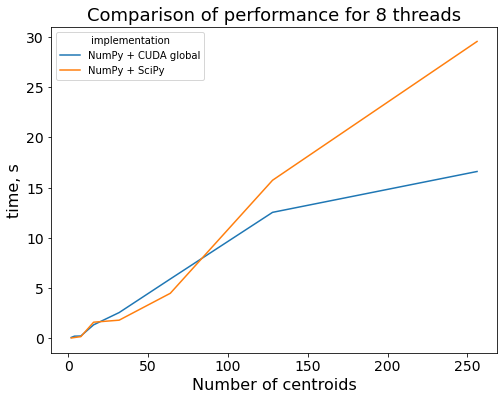

In [4]:
nthreads = 8
df_ = df[(df['nthreads'] == nthreads)].copy()

fig, ax = plt.subplots(figsize=(8,6))
pivot = df_.pivot_table(index=['num_centroids'], columns='implementation', values='time')
pivot.plot(ax=ax)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Number of centroids', size=16)
plt.ylabel('time, s', size=16)
plt.title(f'Comparison of performance for {nthreads} threads', size=18);

## Time vs implementation and number of threads

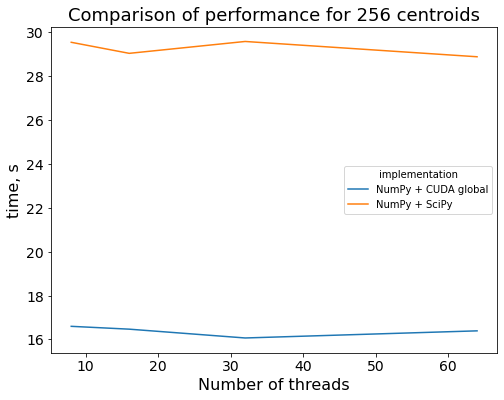

In [5]:
num_centroids = 256
df_ = df[(df['num_centroids'] == num_centroids)].copy()

fig, ax = plt.subplots(figsize=(8,6))
pivot = df_.pivot_table(index=['nthreads'], columns='implementation', values='time')
pivot.plot(ax=ax)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Number of threads', size=16)
plt.ylabel('time, s', size=16)
plt.title(f'Comparison of performance for {num_centroids} centroids', size=18);

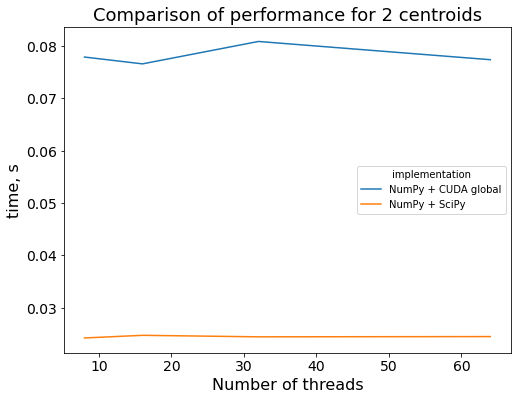

In [6]:
num_centroids = 2
df_ = df[(df['num_centroids'] == num_centroids)].copy()

fig, ax = plt.subplots(figsize=(8,6))
pivot = df_.pivot_table(index=['nthreads'], columns='implementation', values='time')
pivot.plot(ax=ax)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Number of threads', size=16)
plt.ylabel('time, s', size=16)
plt.title(f'Comparison of performance for {num_centroids} centroids', size=18);